# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 5. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**


* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [629]:
# Bot check

# HW_ID: fpmi_ad5
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [630]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики, которые при необходимости можно доработать.

In [631]:
import numpy as np
import matplotlib.pyplot as plt

# Закомментируйте строку ниже для запуска локально
# from coin import coin, uniform_pdf, norm_pdf, expon_pdf


# Для запуска локально используйте:
#
import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    generated_ones = np.reshape(coin(np.prod(size) * precision), 
                                (size if type(size) != int else (size,)) + (precision,))
    uniform_nums = (generated_ones * np.power(0.5, np.arange(start=1, stop=precision + 1))).sum(axis=-1)
    return  uniform_nums


def plot_uniform_density(size=200):
    grid = np.linspace(-0.25, 1.25, 500)
    random_values = uniform(size)

    plt.figure(figsize=(8, 8))
    ax = plt.axes()

    ax.scatter(x=random_values, y=np.zeros(size), alpha=0.4)
    ax.hist(random_values, alpha=0.4, bins=10, density=True)
    ax.plot(grid, uniform_pdf(grid))
    ax.set_xlim(0, 1)

    ax.set_title('Плотность равномерного распределения')
    
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 3))
    plt.suptitle('Равномерное распределение при precision:')

    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        current_plot = plt.subplot(3, 2, i + 1)
        current_plot.set_ylabel(precision, rotation=0, labelpad=20)

        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha=0.4
        )

        plt.yticks([])
        if i < 4:
            plt.xticks([])

    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    uniforms1 = uniform(size, precision)
    uniforms2 = uniform(size, precision)
    normals = np.sqrt(-2 * np.log(uniforms1)) * np.cos(2 * np.pi * uniforms2)
    return loc + scale * normals


def plot_normal_density(size=200):
    grid = np.linspace(-3, 3, 500)
    random_values = normal(size)

    plt.figure(figsize=(8, 8))
    ax = plt.axes()

    ax.scatter(x=random_values, y=np.zeros(size), alpha=0.4)
    ax.hist(random_values, alpha=0.4, bins=10, density=True)
    ax.plot(grid, norm_pdf(grid))
    ax.set_xlim(-3, 3)

    ax.set_title('Плотность нормального распределения')
    
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    uniforms = uniform(size, precision)
    return -np.log(1 - uniforms) / lambd


def plot_expon_density(size=100):
    grid = np.linspace(-0.5, 5, 500)
    random_values = expon(size)

    plt.figure(figsize=(8, 8))
    ax = plt.axes()

    ax.scatter(x=random_values, y=np.zeros(size), alpha=0.4)
    ax.hist(random_values, alpha=0.4, bins=10, density=True)
    ax.plot(grid, norm_pdf(grid))
    ax.set_xlim(-0.5, 5)

    ax.set_title('Плотность экспоненциального распределения')
    
    return plt.gcf()

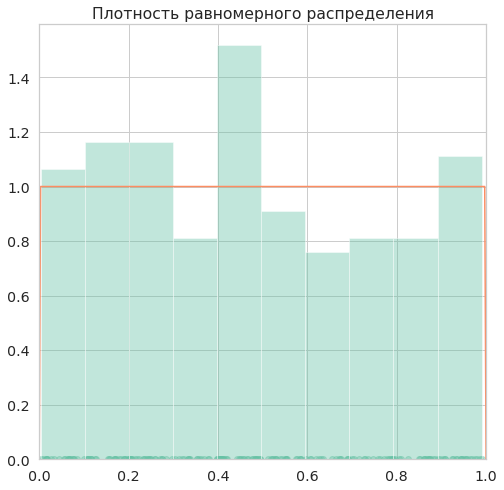

In [632]:
plot_uniform_density(200)
None

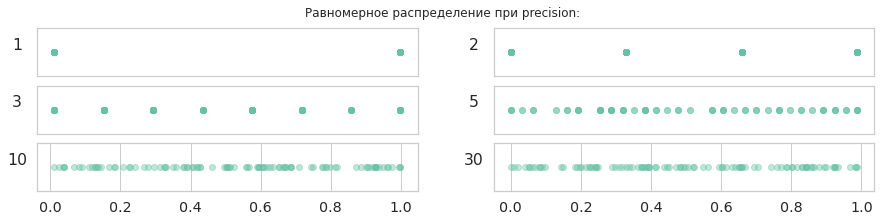

In [633]:
plot_uniform_different_precision()
None

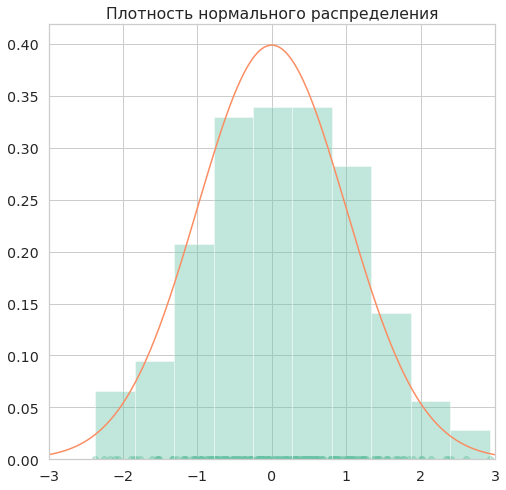

In [634]:
plot_normal_density()
None

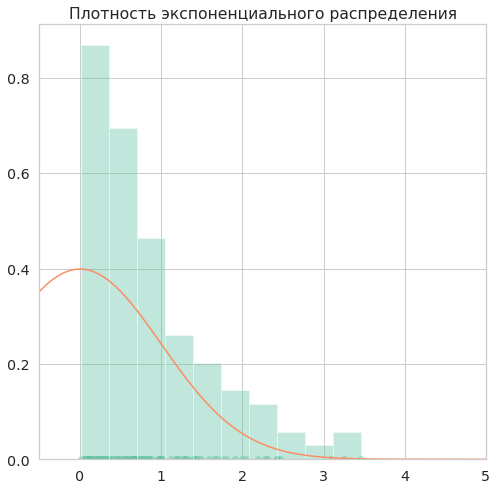

In [635]:
plot_expon_density()
None

**Выводы:**

Разные распределения отличаются друг от друга графиками плотности, но схожи сами с собой вне зависимости от выборки.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

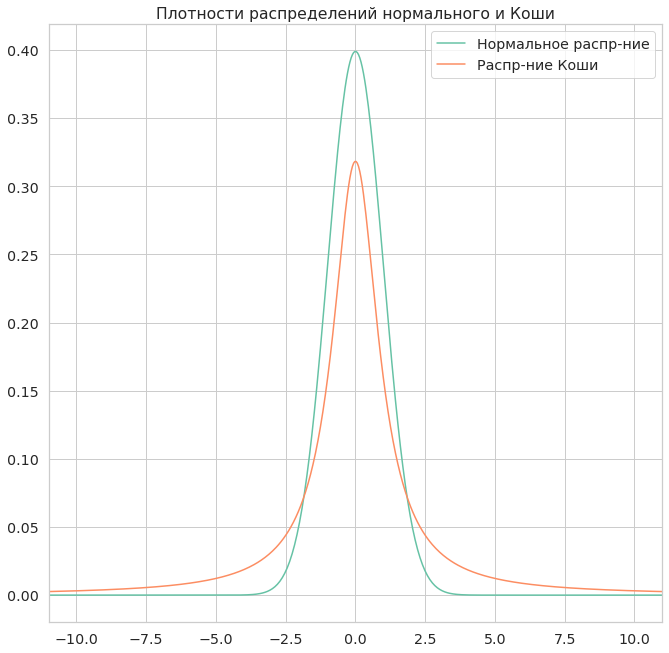

In [636]:
grid = np.linspace(-11, 11, 500)

plt.figure(figsize=(11, 11))
ax = plt.axes()

ax.plot(grid, sps.norm.pdf(grid), label='Нормальное распр-ние')
ax.plot(grid, sps.cauchy.pdf(grid), label='Распр-ние Коши')
ax.set_xlim(-11, 11)
ax.legend(loc='upper right')
ax.set_title('Плотности распределений нормального и Коши')

plt.show()

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

In [637]:
size = 10000
samples_count = 500 

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)

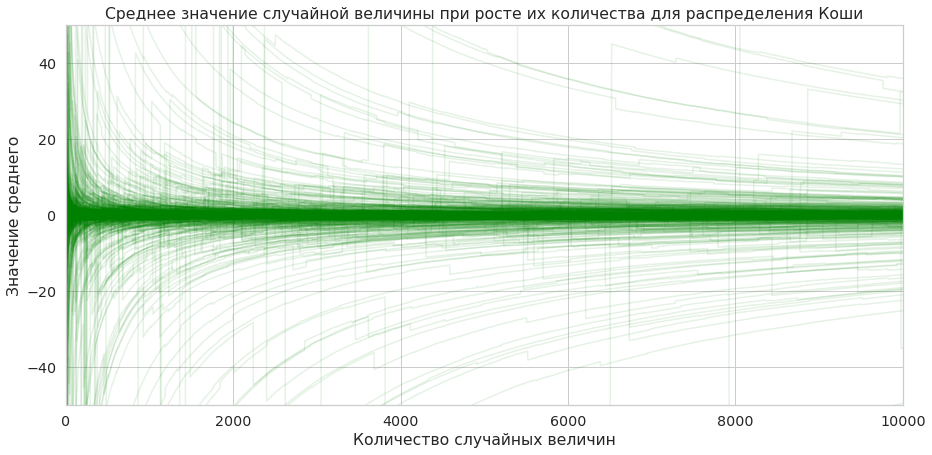

In [638]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_means[i], color='green', alpha=0.1)

plt.title('Среднее значение случайной величины при росте их количества для распределения Коши')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size))
plt.ylim((-50, 50))
None

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

In [639]:
size = 1000
samples_count = 500 

samples = sps.cauchy.rvs(size=(samples_count, size))
cum_medians = np.array([np.median(samples[:,:i+1], axis=1) for i in range(size)])
cum_medians = cum_medians.T
None

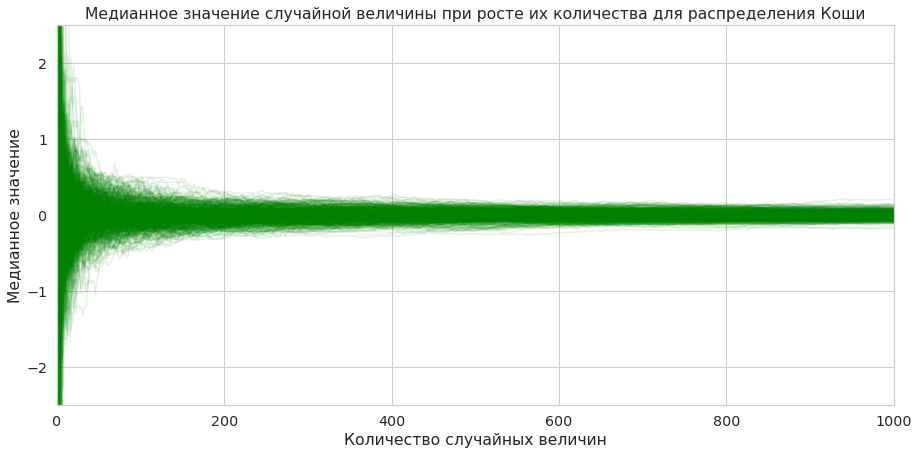

In [640]:
plt.figure(figsize=(15, 7))

# рисуем для каждой выборки отдельно
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, cum_medians[i], color='green', alpha=0.1)

plt.title('Медианное значение случайной величины при росте их количества для распределения Коши')
plt.xlabel('Количество случайных величин')
plt.ylabel('Медианное значение')
plt.xlim((0, size))
plt.ylim((-2.5, 2.5))
None

**Вывод:**

Видим, что закон больших чисел выполняется и для распределения Коши: с ростом количества рассматриваемых случайных величин, уточняется к нулю их среднее арифметическое и медианное значения.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec3_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [641]:
K = 500

In [642]:
def calculate_accuracy(n, a):
    samples = sps.bernoulli(p=a).rvs(size=(K, n))
    cum_means = samples.sum(axis=1)/n
    f_n = np.sum(np.abs(cum_means - a))/K
    return f_n


n = 1
while calculate_accuracy(n, 0.5) > 0.02:
    n += 1
print(n)

359


<ipython-input-642-9de497cdcbd4>:3: RuntimeWarning: invalid value encountered in true_divide
  cum_means = samples.sum(axis=1)/n


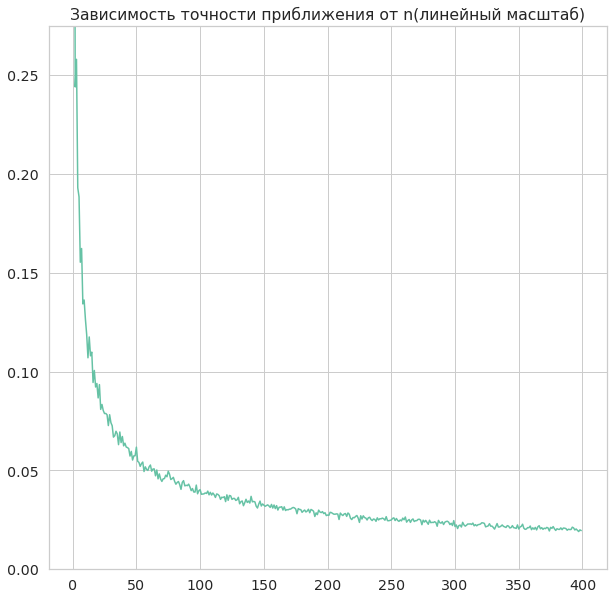

In [643]:
fig = plt.figure(figsize=(10, 10))
plt.title('Зависимость точности приближения от n(линейный масштаб)')
plt.plot([calculate_accuracy(n, 0.5) for n in range(400)])
plt.ylim((0, 0.275))
None

Видим логарифмическую зависимость точности от параметра n.

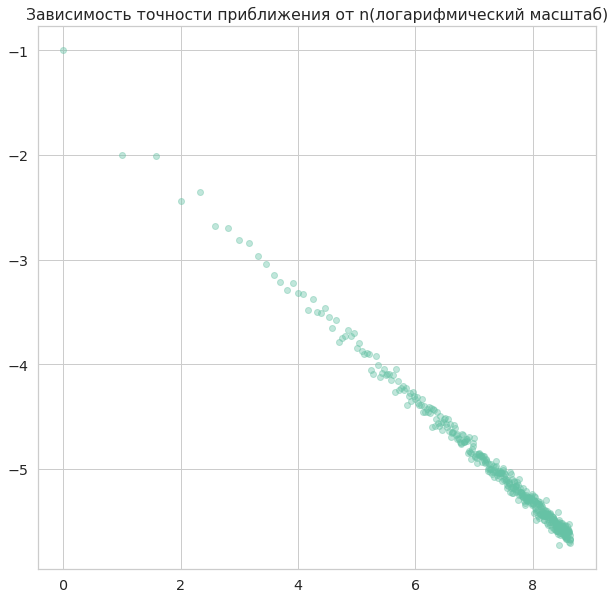

In [644]:
fig = plt.figure(figsize=(10, 10))
plt.title('Зависимость точности приближения от n(логарифмический масштаб)')
accuracies = [calculate_accuracy(n, 0.5) for n in range(1, 400)]
plt.scatter(np.log2(np.arange(1, 400)), np.log2(accuracies), alpha=0.4)

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

In [645]:
def find_n(a):
    n = 1
    while calculate_accuracy(n, a) > 0.02:
        n += 1
    return n

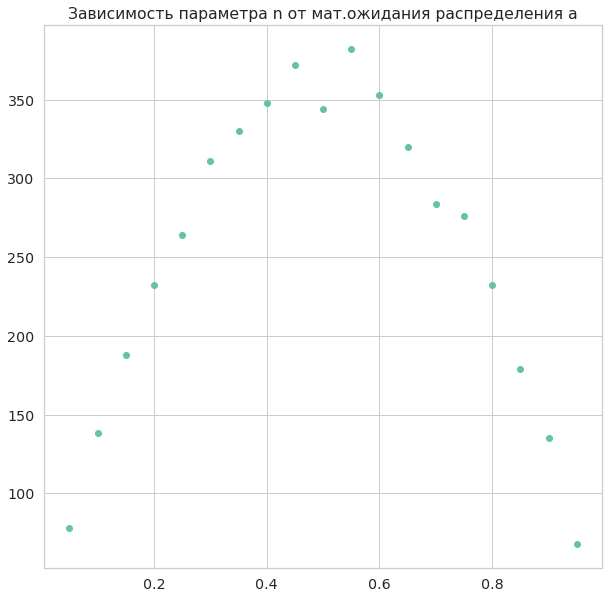

In [646]:
fig = plt.figure(figsize=(10, 10))
plt.title('Зависимость параметра n от мат.ожидания распределения a')
accuracies = [find_n(a) for a in np.arange(0.05, 1, 0.05)]
plt.scatter(np.arange(0.05, 1, 0.05), accuracies, alpha=1)
None

**Выводы:**

С ростом размера выборок, наша функция отклонения от мат.ожидания, (а именно, модуль разности) убывает, причём зависимость между точностью и параметром n показательная. Также, мы поняли, что чем ближе мат.ожидание распределения к 0.5, тем сложнее приблизить среднее отклонение к нулю. 